Paul Steven DSP NFL Predictions

The purpose of this project is to use probability and/or linear regression to predict the outcome of the 2023 NFL Playoffs based on statistics related to the 2022-23 NFL Regular Season. We hope to use different statistical methods to predict the NFL Playoffs as accurately as possible. The majority of our data anyalsis consisted of comparing the z-score of average betting odds pulled from a variety of sports betting sites with the win percentage of the qualifying NFL teams. 

We used two sets of data: 
1. The first set of data was the average betting odds for each NFL team to win the Super Bowl. We pulled this data from a variety of sports betting sites. We then calculated the z-score of the average betting odds for each NFL team.
2. The second set of data was the win percentage of each NFL team from the 2022-23 NFL Regular Season. 

We chose the betting odds because these betting sites have excellent sports anaylists already crunching more numbers and factors then is possible for us alone to complete as the sites intend to make money, and therefore have a vested interest in making the most accurate predictions possible. In order to make the most accurate predictions possible, we took the average of many varying betting sites in order to counteract the bias of any one site caused by a large payment or other factors.

We chose the winning percentage as our second stat because it is a concrete stat that correlates to the quality of the team. It is reasnoable to expect that teams that win more in the regular season will also win more in the playoffs.


In [154]:
# first we import the necessary libraries and load the data into pandas dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df

,Team,DraftKings Betting Odds,Fanduel Betting Odds,Caesars SportsBook Betting Odds,BetMGM Betting Odds,Average Betting Odds,Win Percentage
0,KC,350,330,350,325,338.75,0.824
1,BUF,400,400,375,375,387.50,0.813
2,CIN,800,750,800,750,775.00,0.750
3,JAX,5000,5000,5000,5000,5000.00,0.529
4,BAL,3500,5000,5000,4000,4375.00,0.588
5,LA,2000,2100,2200,2500,2200.00,0.588
6,MIA,6000,10000,10000,8000,8500.00,0.529
7,PHI,550,500,550,500,525.00,0.824
8,SF,500,500,450,450,475.00,0.765
9,MIN,3500,3000,3000,3000,3125.00,0.765


We then cleaned the data by converting the American money into a probability decimal using a formula we found online (https://www.gamingtoday.com/tools/implied-probability/). We then calculated the z-score of the win percentage of each NFL team using the z-score formula.

In [155]:
# conversion functions

def convert_American_money_to_probability(money):
    return 1 - (money/(money+100))

def z_score(mean, std, value):
    return (value - mean)/std

# convert american money odds to probability and adding it as a new column
df['Average Betting Odds Probability'] = np.nan
for ind in df.index:
    df.at[ind, 'Average Betting Odds Probability'] = convert_American_money_to_probability(df.at[ind, 'Average Betting Odds'])

# calculating the z-score and adding it as a new column
df['Average Betting Odds Probability z-score'] = np.nan
for ind in df.index:
    df.at[ind, 'Average Betting Odds Probability z-score'] = z_score(df['Average Betting Odds Probability'].mean(), df['Average Betting Odds Probability'].std(), df.at[ind, 'Average Betting Odds Probability'])

# sort the df by the Average Betting Odds Probability
df = df.sort_values(by=['Average Betting Odds Probability'], ascending=False)
df

,Team,DraftKings Betting Odds,Fanduel Betting Odds,Caesars SportsBook Betting Odds,BetMGM Betting Odds,Average Betting Odds,Win Percentage,Average Betting Odds Probability,Average Betting Odds Probability z-score
0,KC,350,330,350,325,338.75,0.824,0.227920,1.866103
1,BUF,400,400,375,375,387.50,0.813,0.205128,1.575194
8,SF,500,500,450,450,475.00,0.765,0.173913,1.176776
7,PHI,550,500,550,500,525.00,0.824,0.160000,0.999195
2,CIN,800,750,800,750,775.00,0.750,0.114286,0.415715
11,DAL,1200,1300,1300,1600,1350.00,0.706,0.068966,-0.162734
5,LA,2000,2100,2200,2500,2200.00,0.588,0.043478,-0.488044
10,TB,2800,2800,2800,2500,2725.00,0.471,0.035398,-0.591174
9,MIN,3500,3000,3000,3000,3125.00,0.765,0.031008,-0.647213
4,BAL,3500,5000,5000,4000,4375.00,0.588,0.022346,-0.757763


In order to find the winning teams, we compared the z-score of the betting odds to the winning percentage. We used the z-score rather than the probability value because it better highlights the variation between the data points, and so find the outliers that have factors not represented in the winning percentage, but could lead to upset as predicted by the betting sites (such as TB has Tom Brady, which could improve the team's chances at the Super bowl in a way that the winning percentage stat doesn't account for). By putting the z-score and the winning precentage side by side we were able to compare both simulteanously and find a line of best fit between the points (see graph below). Teams above the line of best fit are predicted to have a better chance of winning the Super Bowl, and teams below the line of best fit are predicted to lose in the playoffs. The green line is the horizontal mean of the z-score of the betting odds; any team below this line is likely not to make the later rounds. 

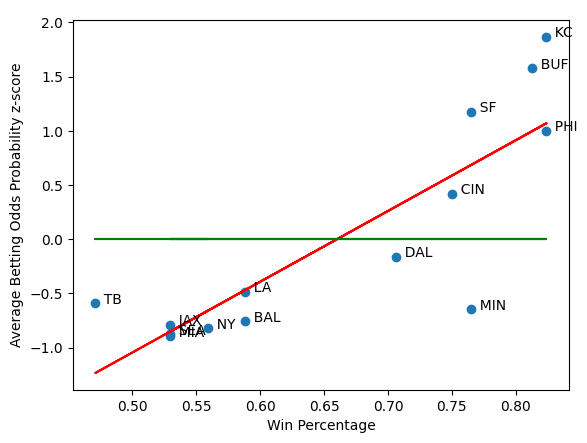

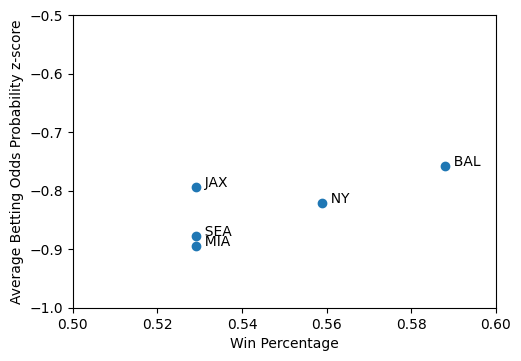

In [156]:
# Plot of the Average Betting Odds Probability vs Win Percentage
plt.plot(df['Win Percentage'], df['Average Betting Odds Probability z-score'], 'o')
plt.xlabel('Win Percentage')
plt.ylabel('Average Betting Odds Probability z-score')

# line of best fit
a, b = np.polyfit(df['Win Percentage'], df['Average Betting Odds Probability z-score'], 1)
plt.plot(df['Win Percentage'], a*df['Win Percentage'] + b, 'r')

# y = 0 line (the z-score of 0 = mean)
plt.plot(df['Win Percentage'], [0]*len(df['Win Percentage']), 'g')

# labeling the points
for ind in df.index:
    plt.text(df.at[ind, 'Win Percentage'], df.at[ind, 'Average Betting Odds Probability z-score'], "  \n  " + str(df.at[ind, 'Team']))

# showing the main graph
plt.show()

# making a seperate smaller - zoomed in - graph to show the points that are clumped together 

fig, ax = plt.subplots(1, 1)
ax.plot(df['Win Percentage'], df['Average Betting Odds Probability z-score'], 'o')
ax.set_xlim(.5, .6)
ax.set_ylim(-1, -.5)
ax.set_xlabel('Win Percentage')
ax.set_ylabel('Average Betting Odds Probability z-score')

# labeling the points on the sub-graph
for ind in df.index:
    if df.at[ind, 'Win Percentage'] > .5 and df.at[ind, 'Win Percentage'] < .6 and df.at[ind, 'Average Betting Odds Probability z-score'] > -1 and df.at[ind, 'Average Betting Odds Probability z-score'] < - .5:
        ax.text(df.at[ind, 'Win Percentage'], df.at[ind, 'Average Betting Odds Probability z-score'], "  \n  " + str(df.at[ind, 'Team']))

fig.tight_layout(pad=5.0)
plt.show()


In [157]:
# calculate r value between Average Betting Odds Probability and Win Percentage
print(df['Average Betting Odds Probability z-score'].corr(df['Win Percentage']))
# R is greater then 0.5, so there is a strong correlation between the Average Betting Odds Probability and Win Percentage

0.8430877443460334


The correlation factor of ~.84 shows the strong correlation between winning percentage and betting odds because R is greater then 0.5, implying that both stats are related to each other and that the winning percentage is a good predictor of the betting odds. It's not a perfect correlation, however, because the R value is not 1. This means that there are other factors that are not represented in the winning percentage that could affect the outcome of the Super Bowl which are respresented in the betting odds data. 

We weighed the winning percentage slightly heavier then the betting odds, but when the points were exremely close (within ~.01% winning percentage) we used the betting odds to make the final decision as to predict the favoured 'upset'.

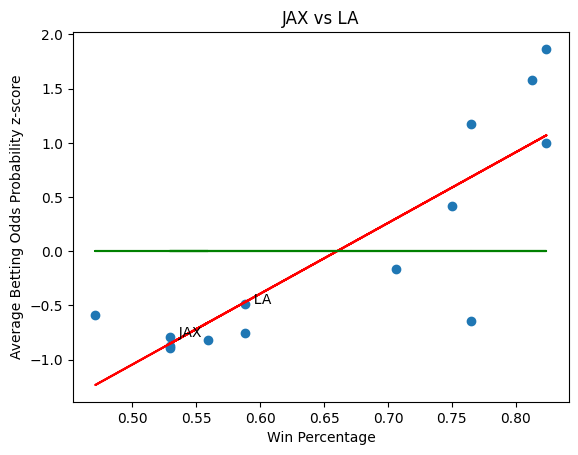

We chose LA to win this matchup because it follows the line farther to the top right (indicating a stronger win percentage and a stronger average betting odds probability). Both have a strong correlation (following close to the line) between the two variables and so we believe there are no other factors to consider, so we chose LA to win this matchup.


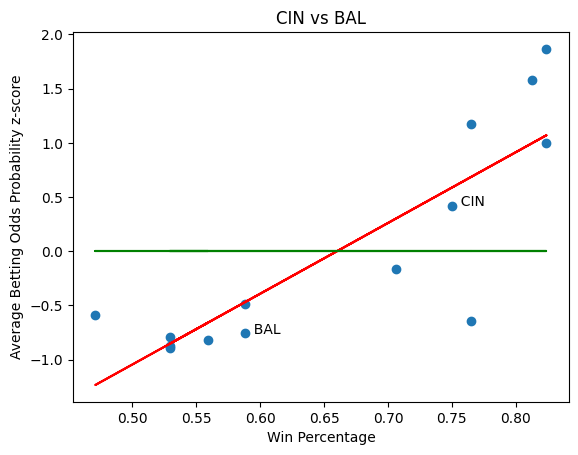

We chose CIN to win this matchup because it follows the line (much) farther to the top right (indicating a stronger win percentage and a stronger average betting odds probability). Both have a strong correlation (following close to the line) between the two variables and so we believe there are no other factors to consider, so we chose CIN to win this matchup.


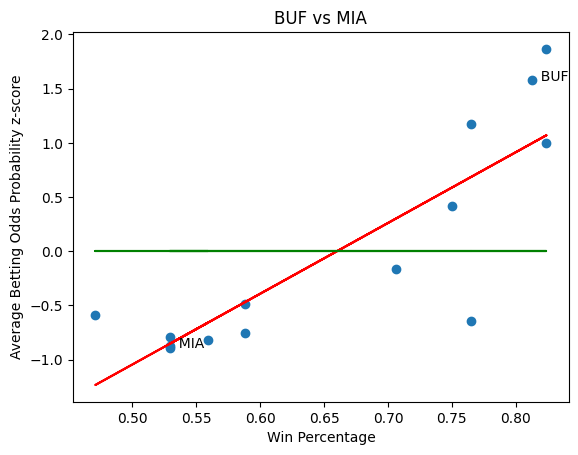

We chose BUF to win this matchup because it follows the line farther to the top right (indicating a stronger win percentage and a stronger average betting odds probability). Both have a strong correlation (following close to the line) between the two variables and so we believe there are no other factors to consider, so we chose BUF to win this matchup. Also, BUF has a higher average betting odds probability further suggeting an easy win.


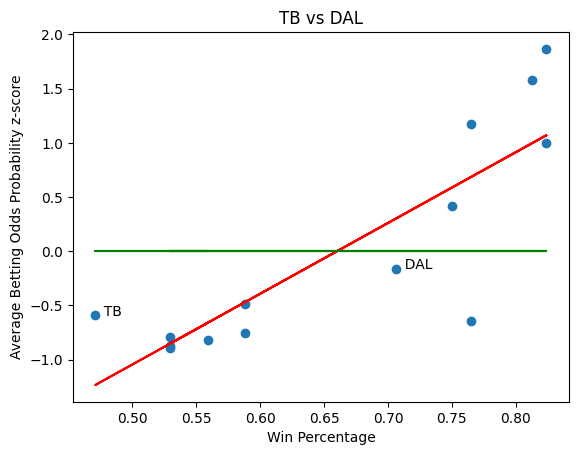

We chose DAL to win this matchup. Although TB is well above the line, indicating that it has a high chance of upset based on factors not represented by their winning percentage, it is not as far above the line as DAL which also has a stronger win percentage. This suggests that DAL has a higher chance of winning this matchup, although an upset could be completely in the realm of possibility.


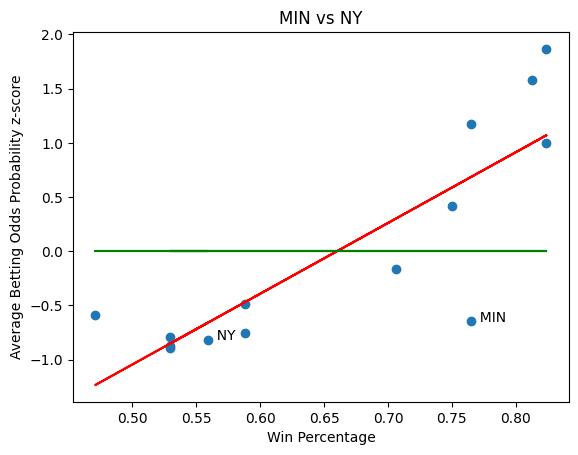

We chose MIN to win this matchup. Although NY is much closer to line then MIN, suggesting that it's stats are a stronger indicator of success, MIN has a significantly higher win percentage and a slightly higher average betting odds probability. This suggests that MIN has a higher chance of winning this matchup, although an upset could be completely in the realm of possibility.


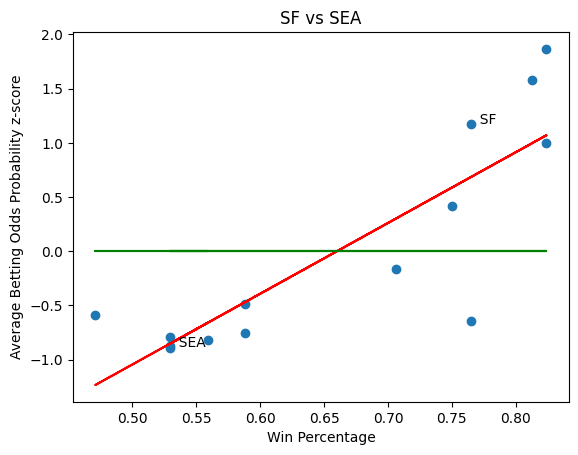

We chose SF to win this matchup because it follows the line farther to the top right (indicating a stronger win percentage and a stronger average betting odds probability). Both have a strong correlation (following close to the line) between the two variables and so we believe there are no other factors to consider, so we chose SF to win this matchup.


In [158]:
# generating visual data for the wildcard matchups

wildcard_matchups = [
    ['JAX', 'LA'],
    ['CIN', 'BAL'],
    ['BUF', 'MIA'],
    ['TB', 'DAL'],
    ['MIN', 'NY'],
    ['SF', 'SEA'],
]

wildcard_matchups_descriptions = {
    'JAX LA' : 'We chose LA to win this matchup because it follows the line farther to the top right (indicating a stronger win percentage and a stronger average betting odds probability). Both have a strong correlation (following close to the line) between the two variables and so we believe there are no other factors to consider, so we chose LA to win this matchup.',
    'CIN BAL' : 'We chose CIN to win this matchup because it follows the line (much) farther to the top right (indicating a stronger win percentage and a stronger average betting odds probability). Both have a strong correlation (following close to the line) between the two variables and so we believe there are no other factors to consider, so we chose CIN to win this matchup.',
    'BUF MIA' : 'We chose BUF to win this matchup because it follows the line farther to the top right (indicating a stronger win percentage and a stronger average betting odds probability). Both have a strong correlation (following close to the line) between the two variables and so we believe there are no other factors to consider, so we chose BUF to win this matchup. Also, BUF has a higher average betting odds probability further suggeting an easy win.',
    'TB DAL' : 'We chose DAL to win this matchup. Although TB is well above the line, indicating that it has a high chance of upset based on factors not represented by their winning percentage, it is not as far above the line as DAL which also has a stronger win percentage. This suggests that DAL has a higher chance of winning this matchup, although an upset could be completely in the realm of possibility.', 
    'MIN NY' : 'We chose MIN to win this matchup. Although NY is much closer to line then MIN, suggesting that it\'s stats are a stronger indicator of success, MIN has a significantly higher win percentage and a slightly higher average betting odds probability. This suggests that MIN has a higher chance of winning this matchup, although an upset could be completely in the realm of possibility.',
    'SF SEA' : 'We chose SF to win this matchup because it follows the line farther to the top right (indicating a stronger win percentage and a stronger average betting odds probability). Both have a strong correlation (following close to the line) between the two variables and so we believe there are no other factors to consider, so we chose SF to win this matchup.',
}

for matchup in wildcard_matchups:
    plt.plot(df['Win Percentage'], df['Average Betting Odds Probability z-score'], 'o')
    # plot only the teams in the matchup
    for ind in df.index:
        if df.at[ind, 'Team'] in matchup:
            plt.text(df.at[ind, 'Win Percentage'], df.at[ind, 'Average Betting Odds Probability z-score'], "  \n  " + str(df.at[ind, 'Team']))
    plt.title(matchup[0] + ' vs ' + matchup[1])
    plt.xlabel('Win Percentage')
    plt.ylabel('Average Betting Odds Probability z-score')

    # line of best fit
    a, b = np.polyfit(df['Win Percentage'], df['Average Betting Odds Probability z-score'], 1)
    plt.plot(df['Win Percentage'], a*df['Win Percentage'] + b, 'r')

    # y = 0 line (the z-score of 0 = mean)
    plt.plot(df['Win Percentage'], [0]*len(df['Win Percentage']), 'g')

    plt.show()

    print(wildcard_matchups_descriptions[matchup[0] + ' ' + matchup[1]])

